<a href="https://colab.research.google.com/github/DRAGNIIR/AI-learning/blob/main/flower_identify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import library
import os 
import numpy as np
from numpy import save
from keras.utils import to_categorical, load_img, img_to_array
from keras.models import Sequential,Model
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Activation, Dropout, LeakyReLU
from keras.optimizers import SGD
import matplotlib.pyplot as plt

# create a folder variable to contain photos
folder = '/content/drive/MyDrive/flower'

photos, labels = list(), list()
#catergorize each photo into  5 flower group 'apricot blossom' 'white daisy' 'lotus' 'rose' 'waterlily'
for file in os.listdir(folder):
    output = None
    if file.startswith('apricot'):  
        output = 0      
    elif file.startswith('daisywhite'):
        output = 1
    elif file.startswith('lotus'):
        output = 2
    elif file.startswith('rose'):
        output = 3
    elif file.startswith('waterlily'):
        output = 4

#adding photos to a data set 
    if output is not None:    
        image = load_img(os.path.join(folder, file), target_size=(200,200,3))
        image = img_to_array(image) 
        
        photos.append(image)
        labels.append(output)

#redefine type for array
photos = np.array(photos) 
labels = np.array(labels)

#normalizing photos array
photos = photos.astype('float32')/255

# One-hot encode labels
labels = to_categorical(labels,5)

#Shaping the model
model = Sequential()
model.add(Conv2D(64,(3,3), padding='same', input_shape=(200, 200,3)))
model.add(Activation('linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))



model.add(Conv2D(128,(3,3), padding = 'same'))
model.add(Activation('linear'))
model.add(MaxPooling2D((2, 2), padding = 'same'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(512, activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(5, activation='softmax'))
model.summary()

# compile the model
sgd = SGD(lr = 0.001, decay = 1e-6, momentum = 0.9, nesterov= True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

history = model.fit(photos, labels, batch_size=128, epochs=20, verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 64)      1792      
                                                                 
 activation (Activation)     (None, 200, 200, 64)      0         
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 200, 200, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 100, 100, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 128)     73856     
                                                                 
 activation_1 (Activation)   (None, 100, 100, 128)     0         
                                                        

/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/20
4/4 [==============================] - 106s 23s/step - loss: 1.5727 - accuracy: 0.2847
Epoch 2/20
4/4 [==============================] - 95s 22s/step - loss: 1.4328 - accuracy: 0.4720
Epoch 3/20
4/4 [==============================] - 98s 23s/step - loss: 1.2740 - accuracy: 0.5718
Epoch 4/20
4/4 [==============================] - 94s 22s/step - loss: 1.1099 - accuracy: 0.6715
Epoch 5/20
4/4 [==============================] - 101s 24s/step - loss: 0.9587 - accuracy: 0.6740
Epoch 6/20
4/4 [==============================] - 97s 22s/step - loss: 0.8226 - accuracy: 0.7178
Epoch 7/20
4/4 [==============================] - 94s 22s/step - loss: 0.7256 - accuracy: 0.7859
Epoch 8/20
4/4 [==============================] - 96s 22s/step - loss: 0.6405 - accuracy: 0.7981
Epoch 9/20
4/4 [==============================] - 91s 21s/step - loss: 0.5889 - accuracy: 0.8054
Epoch 10/20
4/4 [==============================] - 89s 20s/step - loss: 0.5409 - accuracy: 0.8345
Epoch 11/20
4/4 [==========

[0.2846715450286865, 0.4720194637775421, 0.5717761516571045, 0.6715328693389893, 0.6739659309387207, 0.7177615761756897, 0.7858880758285522, 0.798053503036499, 0.8053528070449829, 0.8345499038696289, 0.827250599861145, 0.8248175382614136, 0.871046245098114, 0.8613138794898987, 0.8978102207183838, 0.9075425863265991, 0.9002432823181152, 0.9318735003471375, 0.9221411347389221, 0.9270073175430298]
[1.5726875066757202, 1.4327539205551147, 1.2740402221679688, 1.1098902225494385, 0.9586558938026428, 0.8225741386413574, 0.7255723476409912, 0.6404532790184021, 0.5889484286308289, 0.5409221649169922, 0.5069988965988159, 0.48114094138145447, 0.4566181004047394, 0.39275485277175903, 0.35363301634788513, 0.3300090730190277, 0.3012981414794922, 0.28337162733078003, 0.2609460949897766, 0.2604024410247803]


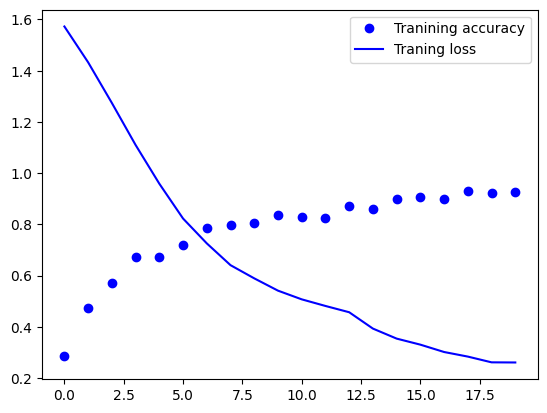

13/13 [==============================] - 26s 2s/step - loss: 0.2178 - accuracy: 0.9392
Test loss: 0.21783939003944397
Test accuracy: 0.9391727447509766


In [ ]:
#ploting the accuracy of the model
accuracy=history.history['accuracy']
loss=history.history['loss']
print(accuracy)
print(loss)
plt.plot(accuracy,'bo',label='Tranining accuracy')
plt.plot(loss,'b',label='Traning loss')
plt.legend()
plt.show()

#test losses and accuracy
score = model.evaluate(photos, labels, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

#save the model 
model.save('flower_identify.h2')

1/1 [==============================] - 0s 477ms/step
[[0.00433424 0.07324951 0.7148593  0.02562298 0.18193401]]


'lotus'

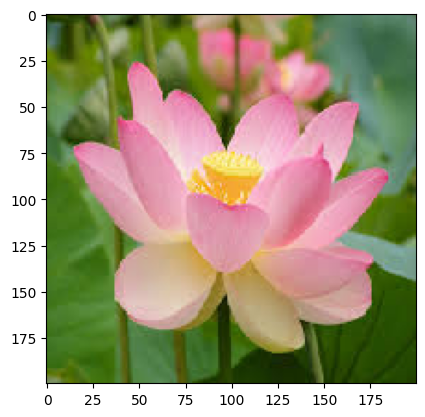

In [ ]:
#classes for each type of flower
classes= ['apricot_blossom','white_daisy','lotus','rose','waterlily']
#load test image
img= load_img('/content/drive/MyDrive/test_flower/lotus.jpg', target_size=(200,200,3))

plt.imshow(img)
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,200,200,3)  
imgRe = imgRe.astype('float32')/255
#predict the image
y_pred = model.predict(imgRe)
print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
classes[y_classes[0]]